In [13]:
import pandas as pd
import scipy.stats
import numpy as np
import wquantiles
import statsmodels

In [2]:
state = pd.read_csv('../제공자료/data/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


평균, 중앙값, 절사평균

평균이 절사평균보다 크고, 절사평균은 중앙값보다 크다

평균 > 절사평균 > 중앙값

In [3]:
print('평균 : ',state['Population'].mean())
print('절사평균 : ',scipy.stats.trim_mean(state['Population'],0.1))
print('중앙값 : ',state['Population'].median())

평균 :  6162876.3
절사평균 :  4783697.125
중앙값 :  4436369.5


가중평균, 가중 중앙값

가중평균과 가중 중앙값을 거의 비슷하다 

In [4]:
print('가중평균 : ',np.average(state['Murder.Rate'],weights=state['Population']))
print('가중 중앙값 : ',wquantiles.median(state['Murder.Rate'],weights=state['Population']))

가중평균 :  4.445833981123393
가중 중앙값 :  4.4


### 주요 개념
- 가장 기본적인 위치 추정 기법은 평균이다. 하지만 극단값(특잇값)에 민감할 수 있다.
- 중앙값, 절사평균과 같은 다른 방법들이 특잇값이나 이상 데이터에 덜 민감하므로 좀 더 로버스트하다.
> 로버스트 : 극단값에 민감하지 않다.

## 변이 추정
- 변이는 데이터 값이 얼마나 밀집해 있는지 혹은 퍼져 있는지를 나타내는 산포도를 나타낸다.

In [19]:
import statsmodels.robust


print('표준편차 :',state['Population'].std())
print('분위수 :',state['Population'].quantile(0.75)-state['Population'].quantile(0.25))
print('평균절대편차 :',statsmodels.robust.scale.mad(state['Population']))

표준편차 : 6848235.347401144
분위수 : 4847308.0
평균절대편차 : 3849876.1459979336


In [20]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

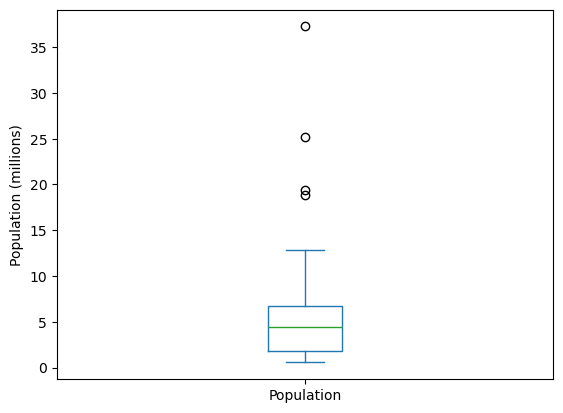

In [21]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

In [22]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

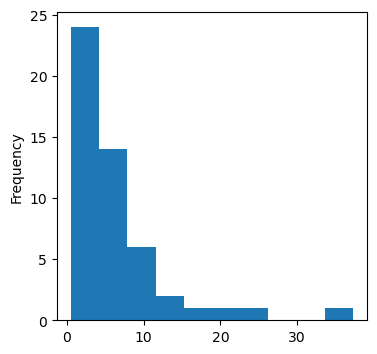

In [23]:
ax = (state['Population']/ 1_000_000).plot.hist(figsize=(4,4))


Text(0.5, 0, 'Murder Rate (per 100,000)')

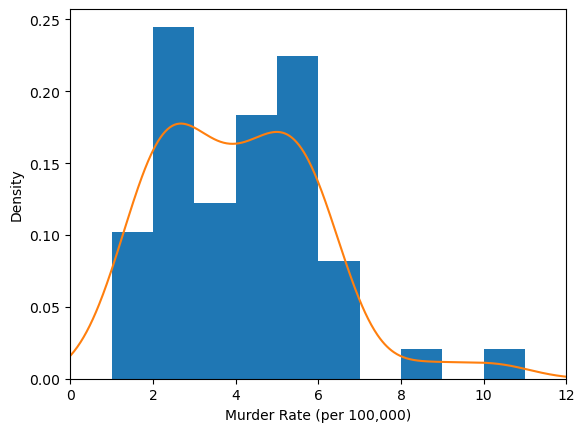

In [25]:
ax = state['Murder.Rate'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')